# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Name & GitHub ID

- Name: Tai Le
- GitHub Username: tnl001

# Research Question

What is the relationship between the amount of violent and violent related crimes and the parks' hour of operation in San Diego?

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


Violent and violent related crimes tend to fall within the operating hour of San Diego parks.

# Dataset(s)

Dataset Name: San Diego Crime Data 2018
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2018_datasd.csv
- Number of observations: 570459
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2018

Dataset Name: San Diego Crime Data 2019
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2019_datasd.csv
- Number of observations: 590967
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2019

Dataset Name: San Diego Crime Data 2020
- Link to the dataset: http://seshat.datasd.org/pd/pd_calls_for_service_2020_datasd.csv
- Number of observations: 522569
- Description: This dataset contains the crime calls that were made and the type of crime that were reported in 2020

Dataset Name: San Diego Crime Crime Call Types
- Link to the dataset: http://seshat.datasd.org/pd/pd_cfs_calltypes_datasd.csv
- Number of observations: 289
- Description: This dataset contains codes of call type and their associated description

Dataset Name: San Diego Police Department Beat Codes
- Link to the dataset: http://seshat.datasd.org/pd/pd_beat_neighborhoods_datasd.csv
- Number of observations: 125
- Description: This dataset contains beat codes that are associated with San Diego neighborhoods

Dataset Name: San Diego Parks
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations: 833
- Description: This dataset includes San Diego parks' names and zipcodes

I plan to combine the 2018, 2019, and 2020 crime call datasets into one big dataset. Then, I plan to use the call type datasets to match the call codes that are used in the crime call datasets. In addition to that, I will also use the beat codes dataset to match the description with the beat codes that are used in the crime call dataset. This way, I will be able to know which neighborhood each call was made from. Lastly, I plan to use the San Diego Parks dataset to identify which park to look at for each neighborhood.

# Setup

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

The provided datasets contain fragments of the ideal dataset that I proposed. Thus, I had to combine different information across all of them in order to obtain what I wanted. The combination of datasets created a very large dataset that has over 1.5 millions observations. Thus, I had to narrow down the types of crime that I thought was the most relevant to my question. In addition, there are also inconsistencies in the labeling of parks' names and neighborhoods' names between datasets, and the structure of some columns also needed major changes. Overall, I tried to keep the final dataframe as coherent with the known facts as I can.

Load in the datasets

In [2]:
crime_2020 = pd.read_csv('pd_calls_for_service_2020_datasd.csv')
crime_2019 = pd.read_csv('pd_calls_for_service_2019_datasd.csv')
crime_2018 = pd.read_csv('pd_calls_for_service_2018_datasd.csv')
call_types = pd.read_csv('pd_cfs_calltypes_datasd.csv')
pd_beat_codes = pd.read_csv('pd_beat_neighborhoods_datasd.csv')
parks_info = pd.read_csv('yelp_SD_parks.csv')

In [3]:
parks_info.shape

(833, 10)

Here, I'm taking a quick look at what the data looks like

In [4]:
crime_2020.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1


In [5]:
crime_2019.head()

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E19010000001,2019-01-01 00:00:01,1,3800,NaN,NATIONAL,AVE,NaN,NaN,NaN,AU1,DUP,441,1
1,E19010000002,2019-01-01 00:00:04,1,6500,NaN,REFLECTION,DR,NaN,NaN,NaN,415,K,321,2
2,E19010000003,2019-01-01 00:00:09,1,0,NaN,06TH,AVE,NaN,ISLAND,NaN,FD,K,523,2
3,E19010000004,2019-01-01 00:00:19,1,0,NaN,VESTA,ST,NaN,MAIN,NaN,AU1,W,511,1
4,E19010000005,2019-01-01 00:00:31,1,0,NaN,04TH,AVE,NaN,ISLAND,NaN,586,CAN,523,4


Taking a look at the call_types dataset

In [6]:
call_types

,call_type,description,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,1016,PRISONER IN CUSTODY,NaN,NaN,NaN
1,1016PT,PTU (PRISONER TRANSPORT),NaN,NaN,NaN
2,1016QC,SHOPLIFTER/QUICK CITE,NaN,NaN,NaN
3,1021,PHONE YOUR STATION,NaN,NaN,NaN
4,1021H,PHONE YOUR HOME,NaN,NaN,NaN
...,...,...,...,...,...
284,TLO,TERRORISM LIAISON OFFICER,NaN,NaN,NaN
285,TP,TRAFFIC PURSUIT,NaN,NaN,NaN
286,TRO,"TRO VIOLATION, REPORT",NaN,NaN,NaN
287,VARDA,VARDA ALARM,NaN,NaN,NaN


Dropping the 3 Unnamed columns

In [7]:
call_types = call_types.dropna(axis=1)
call_types = call_types.drop_duplicates('call_type')

I noticed that there are some inconsistency with the 11-6, 11-7, and 11-8 call type codes when opening them in Excel and reading them as csv using pandas. I replace the inconsistent values with the correct values.

In [8]:
for n in call_types['call_type'].values: 
    call_types['call_type'].replace(to_replace='6-Nov', value='11-6', inplace=True)
    call_types['call_type'].replace(to_replace='7-Nov', value='11-7', inplace=True)
    call_types['call_type'].replace(to_replace='8-Nov', value='11-8', inplace=True)

Merging the cl_crimes with call_types using the left outer joint method. This way, I will have the description from call_types for each call type in cl_crimes.

In [9]:
cl_crimes = pd.concat([crime_2018, crime_2019, crime_2020]).reset_index(drop=True)

In [10]:
cl_crimes = cl_crimes.merge(call_types, how='left')
cl_crimes

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,0,NaN,MONROE,AVE,NaN,PARK,NaN,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,0,NaN,MAIN,ST,NaN,THOR,NaN,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,4300,NaN,OCEAN,BLV,NaN,NaN,NaN,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,4500,NaN,BOYLSTON,ST,NaN,NaN,NaN,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,0,NaN,04TH,AVE,NaN,ISLAND,NaN,1151,O,523,3,PED STOP/FIELD INTERVIEW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683990,E20120001602,2020-12-01 23:23:01,3,1200,NaN,K,ST,NaN,NaN,NaN,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER
1683991,E20120001605,2020-12-01 23:28:18,3,5800,NaN,STREAMVIEW,DR,NaN,NaN,NaN,417,K,823,0,THREATENING W/WEAPON
1683992,E20120001608,2020-12-01 23:33:18,3,100,E,CALLE PRIMERA,NaN,NaN,NaN,NaN,T,K,712,2,TRAFFIC STOP WITH PLATE
1683993,E20120001616,2020-12-01 23:48:27,3,100,NaN,06TH,AVE,NaN,NaN,NaN,SELENF,K,521,3,SELECTIVE ENFORCEMENT


Dropping the unnecessary columns

In [11]:
cl_crimes = cl_crimes.drop(labels=['address_dir_intersecting', 'address_road_intersecting', 
                                           'address_sfx_intersecting', 'address_dir_primary', 
                                           'address_number_primary', 'address_road_primary',
                                           'address_sfx_primary'], axis=1)

In [12]:
cl_crimes.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW


In [13]:
# 'DUP' and 'V' stands for duplicate calls 
rows_to_drop = cl_crimes[(cl_crimes['disposition'] == 'DUP') | (cl_crimes['disposition'] == 'V')]
cl_crimes = cl_crimes.drop(rows_to_drop.index)

In [14]:
cl_crimes

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW
...,...,...,...,...,...,...,...,...
1683990,E20120001602,2020-12-01 23:23:01,3,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER
1683991,E20120001605,2020-12-01 23:28:18,3,417,K,823,0,THREATENING W/WEAPON
1683992,E20120001608,2020-12-01 23:33:18,3,T,K,712,2,TRAFFIC STOP WITH PLATE
1683993,E20120001616,2020-12-01 23:48:27,3,SELENF,K,521,3,SELECTIVE ENFORCEMENT


The beat code will determine which neighborhood it is that the crime occured. Here, I'm taking a quick look at the beat code dataset

In [15]:
pd_beat_codes.head()

,Beat,Neighborhood
0,111,Clairemont Mesa East
1,112,Clairemont Mesa West
2,113,Bay Ho
3,114,North Clairemont
4,115,University City


Renaming the columns so that they are all in lowercase.

In [16]:
pd_beat_codes.columns = ['beat', 'neighborhood']

Merging the cl_crimes with pd_beat_codes using the left outer joint method. This way, I will have the neighborhood's name from pd_beat_codes for each beat code in cl_crimes.

In [17]:
cl_crimes = cl_crimes.merge(pd_beat_codes, how='left')

In [18]:
cl_crimes

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
0,E18010000001,2018-01-01 00:00:09,0,FD,K,624,2,FLAG DOWN/FIELD INITIATED,University Heights
1,E18010000002,2018-01-01 00:00:41,0,AU1,W,511,1,ALL UNITS INFORMATION-PRI 1,Barrio Logan
2,E18010000003,2018-01-01 00:00:52,0,1016,A,122,2,PRISONER IN CUSTODY,Pacific Beach
3,E18010000004,2018-01-01 00:00:55,0,AU1,W,445,1,ALL UNITS INFORMATION-PRI 1,Chollas View
4,E18010000005,2018-01-01 00:00:56,0,1151,O,523,3,PED STOP/FIELD INTERVIEW,Gaslamp
...,...,...,...,...,...,...,...,...,...
1653374,E20120001602,2020-12-01 23:23:01,3,MPSSTP,K,521,2,TRAFFIC STOP FROM THE MOBILE COMPUTER,East Village
1653375,E20120001605,2020-12-01 23:28:18,3,417,K,823,0,THREATENING W/WEAPON,Redwood Village
1653376,E20120001608,2020-12-01 23:33:18,3,T,K,712,2,TRAFFIC STOP WITH PLATE,San Ysidro
1653377,E20120001616,2020-12-01 23:48:27,3,SELENF,K,521,3,SELECTIVE ENFORCEMENT,East Village


Here, I'm just exploring the rows that contain NaN values

In [19]:
cl_crimes[cl_crimes.isna().any(axis=1)]

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood
12,E18010000015,2018-01-01 00:02:44,0,1151,O,-1,3,PED STOP/FIELD INTERVIEW,NaN
17,E18010000023,2018-01-01 00:04:01,0,INFOCHP,K,-1,4,INFORMATION FOR CHP,NaN
84,E18010000098,2018-01-01 00:28:43,0,MPSSTP,O,-1,3,TRAFFIC STOP FROM THE MOBILE COMPUTER,NaN
184,E18010000208,2018-01-01 01:22:24,0,MPSSTP,K,-1,3,TRAFFIC STOP FROM THE MOBILE COMPUTER,NaN
293,E18010000325,2018-01-01 02:14:45,0,INFO,K,-1,3,INFORMATION FOR DISPATCHERS,NaN
...,...,...,...,...,...,...,...,...,...
1653058,E20120001176,2020-12-01 16:36:20,3,1186,K,-1,3,SPECIAL DETAIL,NaN
1653132,E20120001263,2020-12-01 17:36:41,3,AU211,W,-1,1,ROBBERY-ALL UNITS INFORMATION,NaN
1653162,E20120001294,2020-12-01 17:59:42,3,INFO,W,-1,2,INFORMATION FOR DISPATCHERS,NaN
1653294,E20120001458,2020-12-01 20:32:31,3,1021,K,-1,3,PHONE YOUR STATION,NaN


Dropping all rows that contain NaN because:
- For the rows that have their beat code to be = -1, I have no where to find out why they were labeled like that
- For the rows that have their beat code to be < 111, it is obviously that these areas are not in the San Diego County
- With a massive amount of observations (over 1.5 millions), I decided that 39,424 observations that divide across all areas is an acceptable removal

In [20]:
cl_crimes = cl_crimes.dropna()
cl_crimes.shape

(1613955, 9)

Here, I'm focusing on a certain type of crime. Below are the call type codes that I used to extract the data:
1. 11-6: Discharging firearms
2. 207: Kidnapping in progress
3. 207R: Kidnapping report
4. 211: Robbery
5. 278: Child stealing
6. 415V: Disturbing peace with violence
7. 415W: Disturbing peace with[?] weapon
8. 417: Threatening with weapon

In [21]:
filtered_crimes = cl_crimes[(cl_crimes['call_type'] == '11-6') | (cl_crimes['call_type'] == '207') | 
                            (cl_crimes['call_type'] == '207R') | (cl_crimes['call_type'] == '211') |
                            (cl_crimes['call_type'] == '278') | (cl_crimes['call_type'] == '415V') |
                            (cl_crimes['call_type'] == '415W') | (cl_crimes['call_type'] == '418')]

# Each call will be counted as 1
# This column will be used later to count the total amount of calls that were made in a certain area/park
filtered_crimes['total_call'] = 1

In [22]:
filtered_crimes.isna().any()

incident_num    False
date_time       False
day_of_week     False
call_type       False
disposition     False
beat            False
priority        False
description     False
neighborhood    False
total_call      False
dtype: bool

In [23]:
filtered_crimes = filtered_crimes.reset_index(drop=True)
filtered_crimes.head()

,incident_num,date_time,day_of_week,call_type,disposition,beat,priority,description,neighborhood,total_call
0,E18010000022,2018-01-01 00:03:51,0,415V,K,322,1,DISTURBING PEACE W/VIOLENCE,Allied Gardens,1
1,E18010000037,2018-01-01 00:08:30,0,415V,A,518,1,DISTURBING PEACE W/VIOLENCE,South Park,1
2,E18010000041,2018-01-01 00:10:02,0,11-6,U,441,0,DISCHARGING FIREARMS,Mountain View,1
3,E18010000048,2018-01-01 00:11:24,0,11-6,K,512,0,DISCHARGING FIREARMS,Logan Heights,1
4,E18010000067,2018-01-01 00:18:29,0,415V,A,122,1,DISTURBING PEACE W/VIOLENCE,Pacific Beach,1


After doing some exploring and checking on the filtered_crimes dataset, I noticed that the day_of_week column is filled with extremely inconsistent data. Below in the code cell is what I discovered about the pattern in the 2018, 2019, and 2020 datasets. Then, I attempted to cleaning this up by using the following labeling structure for all 3 years:
- 1 = Sunday
- 2 = Monday
- 3 = Tuesday
- 4 = Wednesday
- 5 = Thursday
- 6 = Friday
- 7 = Saturday

In [24]:
# 2018 codes
    # 0 = Monday
    # 1 = Tuesday
    # 2 = Wednesday
    # 3 = Thusday
    # 4 = Friday
    # 5 = Saturday
    # 6 = Sunday

# 2019 codes
    # 0 = Monday (1-9)
    # 1 = Tueday (1-9), 1 = Sunday (10,11,12)
    # 2 = Wednesday (1-9), 2 = Monday (10,11,12)
    # 3 = Thusday (1-9), 3 = Tuesday (10,11,12)
    # 4 = Friday (1-9), 4 = Wednesday (10,11,12)
    # 5 = Saturday (1-9), 5 = Thursday (10,11,12)
    # 6 = Sunday (1-9), 6 = Friday (10,11,12)

# 2020 codes
    # 1 = Sunday
    # 2 = Monday
    # 3 = Tuesday
    # 4 = Wednesday
    # 5 = Thursday
    # 6 = Friday
    # 7 = Saturday
    
# 19592 is where 2018 -> 2019
# 34630 is where 2019 starts the inconsitency
# 38792 is where 2019 -> 2020

# Fix the day of week for the 2018 data
for i in range(0, 19592):
    if filtered_crimes['day_of_week'][i] == 0:
        filtered_crimes['day_of_week'][i] = 2
    elif filtered_crimes['day_of_week'][i] == 1:
        filtered_crimes['day_of_week'][i] = 3
    elif filtered_crimes['day_of_week'][i] == 2:
        filtered_crimes['day_of_week'][i] = 4
    elif filtered_crimes['day_of_week'][i] == 3:
        filtered_crimes['day_of_week'][i] = 5
    elif filtered_crimes['day_of_week'][i] == 4:
        filtered_crimes['day_of_week'][i] = 6
    elif filtered_crimes['day_of_week'][i] == 5:
        filtered_crimes['day_of_week'][i] = 7
    elif filtered_crimes['day_of_week'][i] == 6:
        filtered_crimes['day_of_week'][i] = 1 

In [25]:
# Fix the day of week for the 2019 data
for i in range(19592, 34630):
    if filtered_crimes['day_of_week'][i] == 0:
        filtered_crimes['day_of_week'][i] = 2
    elif filtered_crimes['day_of_week'][i] == 1:
        filtered_crimes['day_of_week'][i] = 3
    elif filtered_crimes['day_of_week'][i] == 2:
        filtered_crimes['day_of_week'][i] = 4
    elif filtered_crimes['day_of_week'][i] == 3:
        filtered_crimes['day_of_week'][i] = 5
    elif filtered_crimes['day_of_week'][i] == 4:
        filtered_crimes['day_of_week'][i] = 6
    elif filtered_crimes['day_of_week'][i] == 5:
        filtered_crimes['day_of_week'][i] = 7
    elif filtered_crimes['day_of_week'][i] == 6:
        filtered_crimes['day_of_week'][i] = 1 

In [26]:
type_time_called = filtered_crimes.groupby('description').sum()
type_time_called = type_time_called.drop(labels=['day_of_week', 'beat', 'priority'], axis=1)

neighbor_time_called = filtered_crimes.groupby('neighborhood').sum()
neighbor_time_called = neighbor_time_called.drop(labels=['day_of_week', 'beat', 'priority'], axis=1)

filtered_crimes['name'] = filtered_crimes['neighborhood']

In [27]:
parks_info.head()

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False


In [28]:
parks_info = parks_info.drop(labels=['phone', 'rating', 'review_count', 'id'], axis=1)

In [29]:
parks_info.head()

,name,address,url,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",https://www.yelp.com/biz/balboa-park-san-diego...,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",https://www.yelp.com/biz/civita-park-san-diego...,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",https://www.yelp.com/biz/waterfront-park-san-d...,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",https://www.yelp.com/biz/trolley-barn-park-san...,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",https://www.yelp.com/biz/bay-view-park-coronad...,-117.178967,32.701785,False


In [30]:
parks_info = parks_info.drop_duplicates('name')

In [31]:
community_park_extract = []

for e in filtered_crimes['name'].unique():
    for i in parks_info['name'].unique():
        if (e in i) & ('Community Park' in i):
            community_park_extract.append(i)

In [32]:
community_park_extract

['Allied Gardens Community Park',
 'North Park Community Park',
 'Mira Mesa Community Park',
 'Linda Vista Community Park',
 'Tierrasanta Community Park and Recreation Center',
 'Princess Del Cerro Community Park',
 'Lake Murray Community Park',
 'Carmel Mountain Ranch Community Park']

Here, I'm extracting the parks' names that match with the existing neighbohood names in filtered_crimes. In addition, some parks' names contain elements that would in general fit the description of a park's name but they are not actually parks. In order to account for that, I had to manually remove certain features that would otherwise falsely categorize a name.

In [33]:
park_extract = []

# First, loop through the filtered_crimnes dataset to get the neighborhoods' names
# Then, loop through the parks_info dataset to get the parks' names
# If a neighborhood's name is contained within a park's name and matches other condition, then extract it
for e in filtered_crimes['name'].unique():
    for i in parks_info['name'].unique():
        if (e in i) & (('Park' in i) | ('Shores' in i))& ('Community' not in i)\
        & ('Private' not in i) & ('Dog' not in i) & ('Optometry' not in i)\
        & ('Massage' not in i) & ('Produce' not in i) & ('Nursery' not in i)\
        & ('Skate' not in i) & ('Parking' not in i) & ('Urbn' not in i)\
        & ('Mini' not in i) & ('619 Spirits' not in i) & ('Taste' not in i)\
        & ('Pure Project' not in i) & ('Kids' not in i) & ('North Park' not in i)\
        & ('Lifeguard' not in i):
            park_extract.append(i)

In [34]:
len(park_extract)

32

In [35]:
# Combining both community park and normal park lists
park_extract = park_extract + community_park_extract

In [36]:
# Creating a new dataframe that contains all of the parks' names
cl_park_data = pd.DataFrame(data=park_extract, columns=['name'])
cl_park_data = cl_park_data.drop_duplicates('name').reset_index(drop=True)

In [37]:
cl_park_data

,name
0,Mountain View Park
1,Grantville Neighborhood Park
2,Petco Park
3,Ocean Beach Park
4,Embarcadero Marina Park North
5,Embarcadero Marina Park South
6,J Street Marina Bayside Park
7,Villa La Jolla Park
8,La Jolla Shores
9,La Jolla Underwater Park


In [38]:
# Dropping [4]Embarcadero Marina Park North because it is not the actual main park and thus no information could be found
# Dropping [6]J Street Marina Bayside Park because there is no associated neighborhood
# Dropping [7]Villa La Jolla Park because I decided to keep La Jolla Shores Park the representative of La Jolla parks
# Dropping [9]La Jolla Underwater Park for the same reason as above
# Dropping [12]Bay Park because it is not an actual park but a neighborhood
# Dropping [13]Kearny Mesa Park because it is a part of the [14]Kearny Mesa Park & Recreation Center
# Dropping [21]Border Field State Park because it is currently closed and thus no information could be found
# Dropping [29]Miramar Lakeview Park because I decided to keep Miramar Overlook Park the representative
cl_park_data = cl_park_data.drop([4, 6, 7, 9, 12, 13, 21, 29]).reset_index(drop=True)

In [39]:
filtered_crimes['park_name'] = ''

In [40]:
neighborhoods = []

for neighborhood in filtered_crimes['name']:
    for name_of_park in cl_park_data['name']:
        if neighborhood in name_of_park:
            neighborhoods.append(neighborhood)  

In [41]:
neighborhoods

['Allied Gardens',
 'Mountain View',
 'Grantville',
 'Petco Park',
 'Ocean Beach',
 'Marina',
 'La Jolla',
 'University Heights',
 'Grantville',
 'North Park',
 'University Heights',
 'Mira Mesa',
 'Ocean Beach',
 'Mountain View',
 'Mountain View',
 'Linda Vista',
 'Bay Park',
 'Marina',
 'Mira Mesa',
 'Grantville',
 'Mountain View',
 'Ocean Beach',
 'Mountain View',
 'Kearny Mesa',
 'Mountain View',
 'Linda Vista',
 'Grantville',
 'North Park',
 'Petco Park',
 'Mira Mesa',
 'North Park',
 'La Jolla',
 'Emerald Hills',
 'Scripps Ranch',
 'Ocean Beach',
 'La Jolla',
 'La Jolla',
 'Balboa Park',
 'Mountain View',
 'Ocean Beach',
 'Linda Vista',
 'Grant Hill',
 'La Jolla',
 'Mira Mesa',
 'Mountain View',
 'Emerald Hills',
 'Kearny Mesa',
 'Scripps Ranch',
 'North Park',
 'Sabre Springs',
 'Ocean Beach',
 'University Heights',
 'Encanto',
 'Allied Gardens',
 'Ocean Beach',
 'Scripps Ranch',
 'Grantville',
 'Marina',
 'Mountain View',
 'North Park',
 'North Park',
 'Mira Mesa',
 'Grantville

Here, I'm extracting the neighborhoods' names into a new dataframe and column using the same technique as when I was extracting the parks' names.

In [42]:
cl_neighborhood_data = pd.DataFrame(data=neighborhoods, columns=['neighborhood_name'])
cl_neighborhood_data = cl_neighborhood_data.drop_duplicates('neighborhood_name').reset_index(drop=True)

In [43]:
cl_park_data['neighborhood'] = ''

In [44]:
for i in range(0, len(cl_park_data['name'].tolist())):
    for e in cl_neighborhood_data['neighborhood_name'].tolist():
        if e in cl_park_data['name'][i]:
            cl_park_data['neighborhood'][i] = e      

In [45]:
cl_park_data

,name,neighborhood
0,Mountain View Park,Mountain View
1,Grantville Neighborhood Park,Grantville
2,Petco Park,Petco Park
3,Ocean Beach Park,Ocean Beach
4,Embarcadero Marina Park South,Marina
5,La Jolla Shores,La Jolla
6,University Heights Park,University Heights
7,Mission Bay Park,Mission Bay Park
8,Kearny Mesa Park & Recreation Center,Kearny Mesa
9,Emerald Hills Park,Emerald Hills


In [46]:
def get_total_call(nbh_name):    
    return filtered_crimes[filtered_crimes['name'].str.contains(nbh_name)].groupby('name').sum()['total_call'].values[0]

In [47]:
cl_park_data['total_call'] = cl_park_data['neighborhood'].apply(get_total_call)

In [48]:
cl_park_data

,name,neighborhood,total_call
0,Mountain View Park,Mountain View,1196
1,Grantville Neighborhood Park,Grantville,581
2,Petco Park,Petco Park,392
3,Ocean Beach Park,Ocean Beach,1331
4,Embarcadero Marina Park South,Marina,662
5,La Jolla Shores,La Jolla,681
6,University Heights Park,University Heights,489
7,Mission Bay Park,Mission Bay Park,303
8,Kearny Mesa Park & Recreation Center,Kearny Mesa,618
9,Emerald Hills Park,Emerald Hills,203


In [49]:
# I tried creating a Google Places API in Google Cloud but it kept returning an error message about retrieving my ClientID
# Because of this error and with limited time, I decided to manually look up the hours of each park
# In addition to these reasons, I also want the static (current) hours of the parks; API might change the result in the future
# I might revamp this part later on when I fix the error
# NOTE: '0-0' means that the park is closed on that day
# Business hour of each park:
#     1. Mountain View Park: 0-24 (Google)
#     2. Grantville Neighborhood Park: 0-24
#     3. Petco Park: 9-21 (Yelp)
#     4. Ocean Beach Park: hour varies (Google)
#     5. Embarcadero Marina Park South: 6-22.5 (Google)
#     6. La Jolla Shores: 0-24
#     7. University Heights Park: 6-22 (Google)
#     8. Mission Bay Park: 4-24 (Yelp)
#     9. Kearny Mesa Park & Recreation Center: 10-20 (Google - Open/Close hours averaged out)
#     10. Emerald Hills Park: 7-20 (Google)
#     11. Scripps Ranch Villages Butterfly Park: 9-17 (Google)
#     12. Balboa Park: 0-24 (Google)
#     13. Grant Hill Park: 0-24 (Google)
#     14. Sabre Springs Park: 9-17 (Google)
#     15. Encanto Park: 5.5-23 (Google)
#     16. Golden Hill Park: 7-18.5 (Google)
#     17. Horton Plaza Park: 5-24 (Google)
#     18. Nestor Neighborhood Park: 6-18 (Google)
#     19. Old Town San Diego State Historic Park: 10-17 (Google)
#     20. San Carlos Park: 11-21 (Google - Mostly)
#     21. Tijuana River Valley Regional Park: 8-20 (Google)
#     22. Miramar Overlook Park: 9-21 (Google)
#     23. Sunset Cliffs Natural Park: 0-24 (Google)
#     24. Allied Gardens Community Park: 11-21 (Google - Mostly)
#     25. North Park Community Park: 0-24 (Google)
#     26. Mira Mesa Community Park: 0-24 (Google)
#     27. Linda Vista Community Park: 0-24 
#     28. Tierrasanta Community Park and Recreation Center: hour varies (Google)
#     29. Princess Del Cerro Community Park: 6-22 (Google)
#     30. Lake Murray Community Park: 7-20 (Google)
#     31. Carmel Mountain Ranch Community Park: hour varies (Google)
cl_park_data['mon'] = ''
cl_park_data['tue'] = ''
cl_park_data['wed'] = ''
cl_park_data['thur'] = ''
cl_park_data['fri'] = ''
cl_park_data['sat'] = ''
cl_park_data['sun'] = ''

def assign_time(park_name, mon, tue, wed, thur, fri, sat, sun):
    cl_park_data.loc[cl_park_data['name'] == park_name, 'mon'] = mon
    cl_park_data.loc[cl_park_data['name'] == park_name, 'tue'] = tue
    cl_park_data.loc[cl_park_data['name'] == park_name, 'wed'] = wed
    cl_park_data.loc[cl_park_data['name'] == park_name, 'thur'] = thur
    cl_park_data.loc[cl_park_data['name'] == park_name, 'fri'] = fri
    cl_park_data.loc[cl_park_data['name'] == park_name, 'sat'] = sat
    cl_park_data.loc[cl_park_data['name'] == park_name, 'sun'] = sun

assign_time('Mountain View Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Grantville Neighborhood Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Petco Park', '9-21', '9-21', '9-21', '9-21', '9-21', '9-21', '9-21')
assign_time('Ocean Beach Park', '10-21', '10-21', '10-21', '10-21', '10-19', '9-16', '0-0')
assign_time('Embarcadero Marina Park South', '6-22.5', '6-22.5', '6-22.5', '6-22.5', '6-22.5', '6-22.5', '6-22.5')
assign_time('La Jolla Shores', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('University Heights Park', '6-22', '6-22', '6-22', '6-22', '6-22', '6-22', '6-22')
assign_time('Mission Bay Park', '4-24', '4-24', '4-24', '4-24', '4-24', '4-24', '4-24')
assign_time('Kearny Mesa Park & Recreation Center', '10-20', '10-21', '10-21', '10-21', '10-19', '9-17', '0-0')
assign_time('Emerald Hills Park', '7-20', '7-20', '7-20', '7-20', '7-20', '7-20', '7-20')
assign_time('Scripps Ranch Villages Butterfly Park', '9-17', '9-17', '9-17', '9-17', '9-17', '9-17', '9-17')
assign_time('Balboa Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Grant Hill Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Sabre Springs Park', '9-17', '9-17', '9-17', '9-17', '9-17', '9-17', '9-17')
assign_time('Encanto Park', '5.5-23', '5.5-23', '5.5-23', '5.5-23', '5.5-23', '5.5-23', '5.5-23')
assign_time('Golden Hill Park', '7-18.5', '7-18.5', '7-18.5', '7-18.5', '7-18.5', '7-18.5', '7-18.5')
assign_time('Horton Plaza Park', '5-24', '5-24', '5-24', '5-24', '5-24', '5-24', '5-24')
assign_time('Nestor Neighborhood Park', '6-18', '6-18', '6-18', '6-18', '6-18', '6-18', '6-18',)
assign_time('Old Town San Diego State Historic Park', '10-17', '10-17', '10-17', '10-17', '10-17', '10-17', '10-17',)
assign_time('San Carlos Park', '11-21', '11-21', '11-21', '11-21', '11-19', '9-17', '10-1')
assign_time('Tijuana River Valley Regional Park', '8-20', '8-20', '8-20', '8-20', '8-20', '8-20', '8-20')
assign_time('Miramar Overlook Park', '9-21', '9-21', '9-21', '9-21', '9-21', '9-21', '9-21')
assign_time('Sunset Cliffs Natural Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Allied Gardens Community Park', '11-21', '11-21', '11-21', '11-21', '11-20', '9-17', '9-15')
assign_time('North Park Community Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Mira Mesa Community Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Linda Vista Community Park', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24', '0-24')
assign_time('Tierrasanta Community Park and Recreation Center', '13-21', '10-21', '12-21', '10-21', '14-21', '9-16', '10-16')
assign_time('Princess Del Cerro Community Park', '6-22', '6-22', '6-22', '6-22', '6-22', '6-22', '6-22')
assign_time('Lake Murray Community Park', '7-20', '7-20', '7-20', '7-20', '7-20', '7-20', '7-20')
assign_time('Carmel Mountain Ranch Community Park', '10-20', '9-21', '10-20', '10-21', '10-19', '9-17', '0-0')

In [50]:
cl_park_data

,name,neighborhood,total_call,mon,tue,wed,thur,fri,sat,sun
0,Mountain View Park,Mountain View,1196,0-24,0-24,0-24,0-24,0-24,0-24,0-24
1,Grantville Neighborhood Park,Grantville,581,0-24,0-24,0-24,0-24,0-24,0-24,0-24
2,Petco Park,Petco Park,392,9-21,9-21,9-21,9-21,9-21,9-21,9-21
3,Ocean Beach Park,Ocean Beach,1331,10-21,10-21,10-21,10-21,10-19,9-16,0-0
4,Embarcadero Marina Park South,Marina,662,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5
5,La Jolla Shores,La Jolla,681,0-24,0-24,0-24,0-24,0-24,0-24,0-24
6,University Heights Park,University Heights,489,6-22,6-22,6-22,6-22,6-22,6-22,6-22
7,Mission Bay Park,Mission Bay Park,303,4-24,4-24,4-24,4-24,4-24,4-24,4-24
8,Kearny Mesa Park & Recreation Center,Kearny Mesa,618,10-20,10-21,10-21,10-21,10-19,9-17,0-0
9,Emerald Hills Park,Emerald Hills,203,7-20,7-20,7-20,7-20,7-20,7-20,7-20


In [51]:
cl_park_data['during'] = 0
cl_park_data['not_during'] = 0
cl_park_data

,name,neighborhood,total_call,mon,tue,wed,thur,fri,sat,sun,during,not_during
0,Mountain View Park,Mountain View,1196,0-24,0-24,0-24,0-24,0-24,0-24,0-24,0,0
1,Grantville Neighborhood Park,Grantville,581,0-24,0-24,0-24,0-24,0-24,0-24,0-24,0,0
2,Petco Park,Petco Park,392,9-21,9-21,9-21,9-21,9-21,9-21,9-21,0,0
3,Ocean Beach Park,Ocean Beach,1331,10-21,10-21,10-21,10-21,10-19,9-16,0-0,0,0
4,Embarcadero Marina Park South,Marina,662,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,0,0
5,La Jolla Shores,La Jolla,681,0-24,0-24,0-24,0-24,0-24,0-24,0-24,0,0
6,University Heights Park,University Heights,489,6-22,6-22,6-22,6-22,6-22,6-22,6-22,0,0
7,Mission Bay Park,Mission Bay Park,303,4-24,4-24,4-24,4-24,4-24,4-24,4-24,0,0
8,Kearny Mesa Park & Recreation Center,Kearny Mesa,618,10-20,10-21,10-21,10-21,10-19,9-17,0-0,0,0
9,Emerald Hills Park,Emerald Hills,203,7-20,7-20,7-20,7-20,7-20,7-20,7-20,0,0


Now, I want to categorize all of the calls that occured in the listed parks/neighborhoods into either 'during' or 'not_during'. To do this, I need to compare the time that the call occured (in hour) to the operating hour at that specific day. For example, if a call occured at 11pm on Thursday at park A, then I will compare 11pm to the operating hour of park A on Thursday. There are seven days in a week, so my function will compare the day first before comparing the hour.

In [52]:
# A function that categorizes time of call into 'during' and 'not_during'
# It takes in the name of a neighborhood as a parameter and this will be used in place of the park's name
# After that, the day_of_week and date_time columns of that neighborhood will be copied to two lists.
# Then, the operating hour of that park will be extracted
# By using the day_of_week data, the function will be able to compare the occured time to operating hour of that specific day
# If the hour falls within the operating hour, then it will increment 'during' by 1
# If not then it will increment 'not_during' by 1
# The function essentially does the same step 7 times for 7 days of the week
def time_categorize(name):
    dates = filtered_crimes[filtered_crimes['name'] == name]['day_of_week'].tolist()
    time_stamps = pd.to_datetime(filtered_crimes[filtered_crimes['name'] == name]['date_time']).dt.strftime('%H').tolist()
    
    for i in range(0, len(dates)):
        if dates[i] == 1:
            busi_hour = cl_park_data.loc[cl_park_data['neighborhood'] == name, 'sun'].values[0]
            open_time = float(busi_hour[:busi_hour.find('-')])
            close_time = float(busi_hour[busi_hour.find('-') + 1:])
            
            if (float(time_stamps[i]) >= open_time) & (float(time_stamps[i]) <= close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'during'] += 1
            elif (float(time_stamps[i]) < open_time) | (float(time_stamps[i]) > close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'not_during'] += 1
        elif dates[i] == 2:
            busi_hour = cl_park_data.loc[cl_park_data['neighborhood'] == name, 'mon'].values[0]
            open_time = float(busi_hour[:busi_hour.find('-')])
            close_time = float(busi_hour[busi_hour.find('-') + 1:])
            
            if (float(time_stamps[i]) >= open_time) & (float(time_stamps[i]) <= close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'during'] += 1
            elif (float(time_stamps[i]) < open_time) | (float(time_stamps[i]) > close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'not_during'] += 1
        elif dates[i] == 3:
            busi_hour = cl_park_data.loc[cl_park_data['neighborhood'] == name, 'tue'].values[0]
            open_time = float(busi_hour[:busi_hour.find('-')])
            close_time = float(busi_hour[busi_hour.find('-') + 1:])
            
            if (float(time_stamps[i]) >= open_time) & (float(time_stamps[i]) <= close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'during'] += 1
            elif (float(time_stamps[i]) < open_time) | (float(time_stamps[i]) > close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'not_during'] += 1
        elif dates[i] == 4:
            busi_hour = cl_park_data.loc[cl_park_data['neighborhood'] == name, 'wed'].values[0]
            open_time = float(busi_hour[:busi_hour.find('-')])
            close_time = float(busi_hour[busi_hour.find('-') + 1:])
            
            if (float(time_stamps[i]) >= open_time) & (float(time_stamps[i]) <= close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'during'] += 1
            elif (float(time_stamps[i]) < open_time) | (float(time_stamps[i]) > close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'not_during'] += 1
        elif dates[i] == 5:
            busi_hour = cl_park_data.loc[cl_park_data['neighborhood'] == name, 'thur'].values[0]
            open_time = float(busi_hour[:busi_hour.find('-')])
            close_time = float(busi_hour[busi_hour.find('-') + 1:])
            
            if (float(time_stamps[i]) >= open_time) & (float(time_stamps[i]) <= close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'during'] += 1
            elif (float(time_stamps[i]) < open_time) | (float(time_stamps[i]) > close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'not_during'] += 1
        elif dates[i] == 6:
            busi_hour = cl_park_data.loc[cl_park_data['neighborhood'] == name, 'fri'].values[0]
            open_time = float(busi_hour[:busi_hour.find('-')])
            close_time = float(busi_hour[busi_hour.find('-') + 1:])
            
            if (float(time_stamps[i]) >= open_time) & (float(time_stamps[i]) <= close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'during'] += 1
            elif (float(time_stamps[i]) < open_time) | (float(time_stamps[i]) > close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'not_during'] += 1
        elif dates[i] == 7:
            busi_hour = cl_park_data.loc[cl_park_data['neighborhood'] == name, 'sat'].values[0]
            open_time = float(busi_hour[:busi_hour.find('-')])
            close_time = float(busi_hour[busi_hour.find('-') + 1:])
            
            if (float(time_stamps[i]) >= open_time) & (float(time_stamps[i]) <= close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'during'] += 1
            elif (float(time_stamps[i]) < open_time) | (float(time_stamps[i]) > close_time):
                cl_park_data.loc[cl_park_data['neighborhood'] == name, 'not_during'] += 1

In [53]:
cl_park_data

,name,neighborhood,total_call,mon,tue,wed,thur,fri,sat,sun,during,not_during
0,Mountain View Park,Mountain View,1196,0-24,0-24,0-24,0-24,0-24,0-24,0-24,0,0
1,Grantville Neighborhood Park,Grantville,581,0-24,0-24,0-24,0-24,0-24,0-24,0-24,0,0
2,Petco Park,Petco Park,392,9-21,9-21,9-21,9-21,9-21,9-21,9-21,0,0
3,Ocean Beach Park,Ocean Beach,1331,10-21,10-21,10-21,10-21,10-19,9-16,0-0,0,0
4,Embarcadero Marina Park South,Marina,662,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,0,0
5,La Jolla Shores,La Jolla,681,0-24,0-24,0-24,0-24,0-24,0-24,0-24,0,0
6,University Heights Park,University Heights,489,6-22,6-22,6-22,6-22,6-22,6-22,6-22,0,0
7,Mission Bay Park,Mission Bay Park,303,4-24,4-24,4-24,4-24,4-24,4-24,4-24,0,0
8,Kearny Mesa Park & Recreation Center,Kearny Mesa,618,10-20,10-21,10-21,10-21,10-19,9-17,0-0,0,0
9,Emerald Hills Park,Emerald Hills,203,7-20,7-20,7-20,7-20,7-20,7-20,7-20,0,0


In [54]:
cl_park_data['neighborhood'].apply(time_categorize)
cl_park_data

,name,neighborhood,total_call,mon,tue,wed,thur,fri,sat,sun,during,not_during
0,Mountain View Park,Mountain View,1196,0-24,0-24,0-24,0-24,0-24,0-24,0-24,1196,0
1,Grantville Neighborhood Park,Grantville,581,0-24,0-24,0-24,0-24,0-24,0-24,0-24,581,0
2,Petco Park,Petco Park,392,9-21,9-21,9-21,9-21,9-21,9-21,9-21,263,129
3,Ocean Beach Park,Ocean Beach,1331,10-21,10-21,10-21,10-21,10-19,9-16,0-0,582,749
4,Embarcadero Marina Park South,Marina,662,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,461,201
5,La Jolla Shores,La Jolla,681,0-24,0-24,0-24,0-24,0-24,0-24,0-24,681,0
6,University Heights Park,University Heights,489,6-22,6-22,6-22,6-22,6-22,6-22,6-22,346,143
7,Mission Bay Park,Mission Bay Park,303,4-24,4-24,4-24,4-24,4-24,4-24,4-24,270,33
8,Kearny Mesa Park & Recreation Center,Kearny Mesa,618,10-20,10-21,10-21,10-21,10-19,9-17,0-0,322,296
9,Emerald Hills Park,Emerald Hills,203,7-20,7-20,7-20,7-20,7-20,7-20,7-20,128,75


In [175]:
# Calculate the median closing hour of each park
# This list will then be used to create a new column called 'median_close_hour'
# The reason that I decided to find the median is because some parks have fluctuating hour (they might even be closed on some day)
median_close_hour = []

# Loop through the parks' names
for i in range(0, len(cl_park_data['name'].tolist())):
    close_hour_list = []
    name_of_park = cl_park_data['name'][i]
    week_days = ['mon','tue','wed','thur','fri','sat','sun']
    
    # Get the hour of a park and put them into a list
    hour_list = cl_park_data.loc[cl_park_data['name'] == name_of_park, week_days].values[0].tolist()
    for e in range(0, len(hour_list)):
        # Extract the closing hour of each day
        close_hour = float(hour_list[e][hour_list[e].find('-')+1:])
        close_hour_list.append(close_hour)
    
    # Find the median (numpy.median automatically sorts the list)
    median_close_hour.append(np.median(close_hour_list))

In [176]:
median_close_hour

[24.0,
 24.0,
 21.0,
 21.0,
 22.5,
 24.0,
 22.0,
 24.0,
 20.0,
 20.0,
 17.0,
 24.0,
 24.0,
 17.0,
 23.0,
 18.5,
 24.0,
 18.0,
 17.0,
 21.0,
 20.0,
 21.0,
 24.0,
 21.0,
 24.0,
 24.0,
 24.0,
 21.0,
 22.0,
 20.0,
 20.0]

In [177]:
cl_park_data['median_close_hour'] = median_close_hour

In [178]:
cl_park_data

,name,neighborhood,total_call,mon,tue,wed,thur,fri,sat,sun,during,not_during,median_close_hour
0,Mountain View Park,Mountain View,1196,0-24,0-24,0-24,0-24,0-24,0-24,0-24,1196,0,24.0
1,Grantville Neighborhood Park,Grantville,581,0-24,0-24,0-24,0-24,0-24,0-24,0-24,581,0,24.0
2,Petco Park,Petco Park,392,9-21,9-21,9-21,9-21,9-21,9-21,9-21,263,129,21.0
3,Ocean Beach Park,Ocean Beach,1331,10-21,10-21,10-21,10-21,10-19,9-16,0-0,582,749,21.0
4,Embarcadero Marina Park South,Marina,662,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,6-22.5,461,201,22.5
5,La Jolla Shores,La Jolla,681,0-24,0-24,0-24,0-24,0-24,0-24,0-24,681,0,24.0
6,University Heights Park,University Heights,489,6-22,6-22,6-22,6-22,6-22,6-22,6-22,346,143,22.0
7,Mission Bay Park,Mission Bay Park,303,4-24,4-24,4-24,4-24,4-24,4-24,4-24,270,33,24.0
8,Kearny Mesa Park & Recreation Center,Kearny Mesa,618,10-20,10-21,10-21,10-21,10-19,9-17,0-0,322,296,20.0
9,Emerald Hills Park,Emerald Hills,203,7-20,7-20,7-20,7-20,7-20,7-20,7-20,128,75,20.0


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

Visualizing the total crime calls of each park

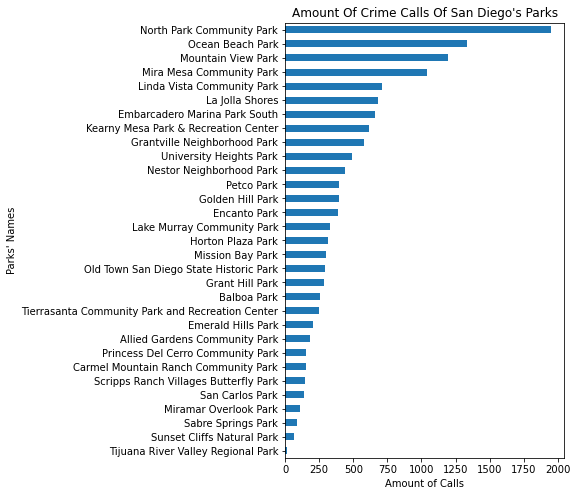

In [229]:
cl_park_data.sort_values('total_call').plot(x='name', y='total_call', kind='barh',figsize=(5,8), legend=False)
plt.title("Amount Of Crime Calls Of San Diego's Parks")
plt.xlabel('Amount of Calls')
plt.ylabel("Parks' Names")
f1 = plt.gcf()

In [88]:
week_days = ['mon','tue','wed','thur','fri','sat','sun']
open_all_day = []
close_before_8 = []
close_before_11 = []

for i in range(0, len(cl_park_data['name'].tolist())):
    all_day = ['0-24','0-24','0-24','0-24','0-24','0-24','0-24',]
    if cl_park_data.iloc[i][week_days].tolist() == all_day:
        open_all_day.append(cl_park_data.iloc[i]['name'])
    elif cl_park_data.iloc[i]



In [89]:
open_all_day

['Mountain View Park',
 'Grantville Neighborhood Park',
 'La Jolla Shores',
 'Balboa Park',
 'Grant Hill Park',
 'Sunset Cliffs Natural Park',
 'North Park Community Park',
 'Mira Mesa Community Park',
 'Linda Vista Community Park']

In [277]:
grouped_by_hour = cl_park_data.groupby('median_close_hour', as_index=False)
grouped_by_hour = grouped_by_hour.sum().sort_values('total_call').reset_index(drop=True)

In [278]:
grouped_by_hour

,median_close_hour,total_call,during,not_during
0,23.0,384,317,67
1,18.5,392,159,233
2,18.0,439,216,223
3,17.0,518,189,329
4,22.0,643,455,188
5,22.5,662,461,201
6,20.0,1314,734,580
7,21.0,2393,1131,1262
8,24.0,7391,7307,84


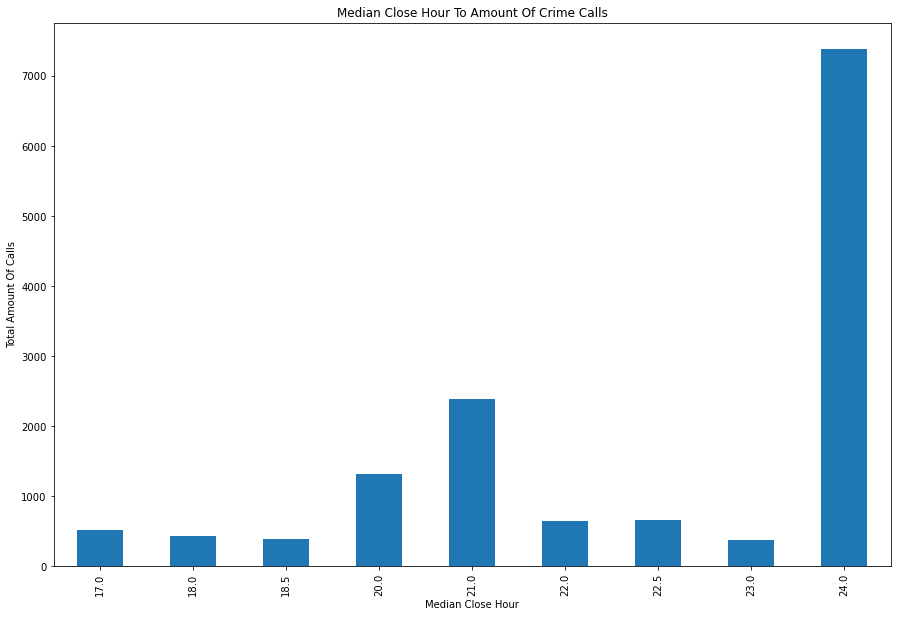

In [224]:
grouped_by_hour.sort_values('median_close_hour').plot(x='median_close_hour',y='total_call', 
                                                      kind='bar', figsize=(15,10), legend=False)
plt.title("Median Close Hour To Amount Of Crime Calls")
plt.xlabel('Median Close Hour')
plt.ylabel('Total Amount Of Calls')
f2 = plt.gcf()

What about crime calls that occured during the operating hour?

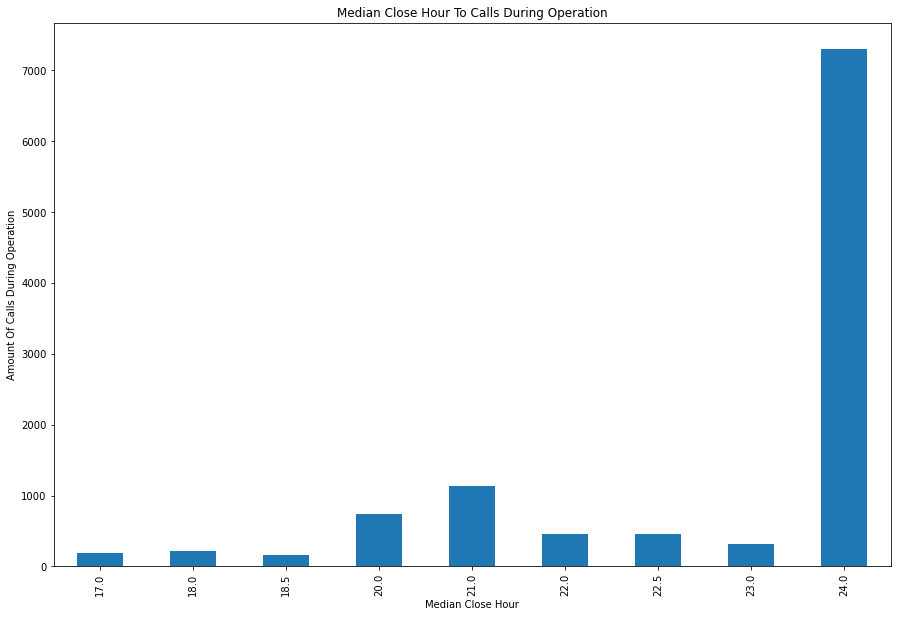

In [225]:
grouped_by_hour.sort_values('median_close_hour').plot(x='median_close_hour',y='during', 
                                                      kind='bar', figsize=(15,10), legend=False)
plt.title("Median Close Hour To Calls During Operation")
plt.xlabel('Median Close Hour')
plt.ylabel('Amount Of Calls During Operation')
f3 = plt.gcf()

Here, I'm attempting to categorize the median closing hours into 'early' and 'late' in terms of my own consideration for early and late closing hour. An early hour is less than or equal to 20 (or 8pm), and a late hour is less than or equal to 24 (midnight) AND greater than 20 (8pm). These categories will be put into a new column called status.

In [281]:
grouped_by_hour['status'] = ''

In [282]:
for i in grouped_by_hour['median_close_hour']:
    if i <= 20.0:
        grouped_by_hour.loc[grouped_by_hour['median_close_hour'] == i, 'status'] = 'early'
    elif (i > 20.0) & (i < 24.0):
        grouped_by_hour.loc[grouped_by_hour['median_close_hour'] == i, 'status'] = 'late'
    else:
        grouped_by_hour.loc[grouped_by_hour['median_close_hour'] == i, 'status'] = 'midnight'

In [283]:
grouped_by_status = grouped_by_hour.groupby('status', as_index=False)
grouped_by_status = grouped_by_status.sum()

In [291]:
grouped_by_status

,status,median_close_hour,total_call,during,not_during
0,early,73.5,2663,1298,1365
1,late,88.5,4082,2364,1718
2,midnight,24.0,7391,7307,84


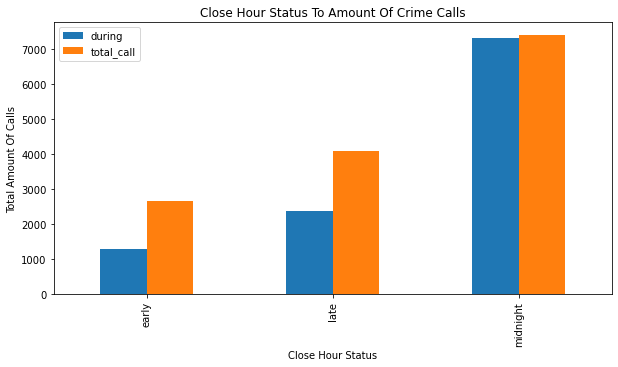

In [295]:
grouped_by_status.plot(x='status', y=['during','total_call'], kind='bar', figsize=(10,5), legend=True)
plt.title('Close Hour Status To Amount Of Crime Calls')
plt.xlabel('Close Hour Status')
plt.ylabel('Total Amount Of Calls')
f4 = plt.gcf()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*